# Histogramas de densidades en el halo de materia oscuro


Importar librerias

```{notebook}

```


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 
import numpy as np

Funcion para graficar la densidad de las posiciones de los halos individuales </p>


In [3]:
def cartessian_projection(pos, figname):
   """_summary_

   Args:
         pos (dataframe): _description_
         figname (_type_): _description_

   Returns:
         _type_: _description_
   """
   fig, ax = plt.subplots(1, 3, figsize=(15,5), sharex=True)
   ax[0].hist2d(pos['x[kpc]'], pos['y[kpc]'],  bins=np.linspace(-150,150,150), norm=LogNorm())
   ax[0].set_xlabel(r"x[$kpc$]") 
   ax[0].set_ylabel(r"y[$kpc$]") 
   ax[0].title.set_text("Proyección en xy")
   # ax[0].title.set_fontsize(15)
   
   ax[1].hist2d(pos['y[kpc]'], pos['z[kpc]'],  bins=np.linspace(-150,150,150), norm=LogNorm())
   ax[1].set_xlabel(r"y[$kpc$]") 
   ax[1].set_ylabel(r"z[$kpc$]") 
   ax[1].title.set_text("Proyección en yz")
   ax[2].hist2d(pos['x[kpc]'], pos['z[kpc]'],  bins=np.linspace(-150,150,150), norm=LogNorm())
   ax[2].set_xlabel(r"x[$kpc$]") 
   ax[2].set_ylabel(r"z[$kpc$]") 
   ax[2].title.set_text("Proyección en xz")
   im_xy = ax[0].imshow(pos, vmin=-0.2, vmax=0.2)
   im_yz = ax[1].imshow(pos, vmin=-0.2, vmax=0.2)
   im_xz = ax[2].imshow(pos, vmin=-0.2, vmax=0.2)
   # im0 = ax[0].imshow(np.log10(np.abs(pos['x[kpc]'])), cmap='plasma')

   fig.subplots_adjust(wspace=0.3)
   # plt.tight_layout()
   fig.suptitle("Histograma de posiciones "+figname, fontsize=20)
   # plt.colorbar(im0, ax=ax[0])
   plt.savefig('./../media/imgs/cartessian_projection/'+figname +'.jpg', bbox_inches='tight', dpi = 150)
   
   plt.colorbar(im_xy, ax=ax[0])
   plt.colorbar(im_yz, ax=ax[1])
   plt.colorbar(im_xz, ax=ax[2])
   plt.show()
   plt.close()
   return 0

def cartessian_projection_zoom(pos, figname):
   fig, ax = plt.subplots(1, 1, figsize=(5,5))
   ax.hist2d(pos[0], pos[1],  bins=np.linspace(-150,150,150), norm=LogNorm())
   # ax.title.set_text("Proyección en"+ figname)
   im = ax.imshow( pos, vmin=-0.2, vmax=0.2)
   fig.suptitle("Histograma de posiciones "+figname, fontsize=15)
   plt.xlim(-10,10)
   plt.ylim(-10,10)
   plt.colorbar(im, ax=ax)
   plt.savefig('./../media/imgs/cartessian_projection_zoom/'+figname +'.jpg', bbox_inches='tight', dpi = 150)
   plt.show()
   plt.close()
   



## Lectura de datos


In [4]:
reference = pd.read_csv('../data/rand_mwb1_110.txt', names=["x[kpc]","y[kpc]","z[kpc]","vx[km/s]","vy[km/s]","vz[km/s]"], sep=" ")
perturbed = pd.read_csv('../data/rand_mwlmc5b0_110.txt', names=["x[kpc]","y[kpc]","z[kpc]","vx[km/s]","vy[km/s]","vz[km/s]"], sep=" ")

df_mw = pd.DataFrame(reference)
df_mw_lmc = pd.DataFrame(perturbed)


<p> Uso de la funcion 'cartesian_projection' y 'cartessian_projection_zoom' para graficar las posiciones de las particulas del halo </p>


In [37]:
cartessian_projection(df_mw, "halo no pertubado")
cartessian_projection(df_mw_lmc, "halo pertubado")


cartessian_projection_zoom(pos_xy_mw, "mw ")
cartessian_projection_zoom(pos_xy_mw_lmc, "mw lmc ")

<p> Calculo de los histogramas haciendo uso de la funcion 'histogram2d' de la libreria Numpy </p>


In [6]:


density_xy_1 = np.histogram2d(df_mw['x[kpc]'], df_mw['y[kpc]'],   bins=np.linspace(-150,150,150) )

# for i in density1[0].tolist():
    # print(i,'\n')

# print(type(density1[0].tolist()))

density_xy_2 = np.histogram2d(df_mw_lmc['x[kpc]'], df_mw_lmc['y[kpc]'],  bins=np.linspace(-150,150,150))



density_yz_1 = np.histogram2d(df_mw['y[kpc]'], df_mw['z[kpc]'], bins=np.linspace(-150,150,150))

density_yz_2 = np.histogram2d(df_mw_lmc['y[kpc]'], df_mw_lmc['z[kpc]'], bins=np.linspace(-150,150,150))

density_xz_1 = np.histogram2d(df_mw['x[kpc]'], df_mw['z[kpc]'], bins=np.linspace(-150,150,150))

density_xz_2 = np.histogram2d(df_mw_lmc['x[kpc]'], df_mw_lmc['z[kpc]'], bins=np.linspace(-150,150,150))


<p>Division de las primeras columnas de cada matriz densidad. </p>


C:\Users\Stephanie Cely\AppData\Local\Temp\ipykernel_9384\3100851128.py:36: RuntimeWarning: divide by zero encountered in true_divide
  division_xy = (nparticles_xy_2/nparticles_xy_1)-1
C:\Users\Stephanie Cely\AppData\Local\Temp\ipykernel_9384\3100851128.py:40: RuntimeWarning: divide by zero encountered in true_divide
  division_yz = (nparticles_yz_2/nparticles_yz_1)-1
C:\Users\Stephanie Cely\AppData\Local\Temp\ipykernel_9384\3100851128.py:44: RuntimeWarning: divide by zero encountered in true_divide
  division_xz = (nparticles_xz_2/nparticles_xz_1)-1
C:\Users\Stephanie Cely\AppData\Local\Temp\ipykernel_9384\3100851128.py:44: RuntimeWarning: invalid value encountered in true_divide
  division_xz = (nparticles_xz_2/nparticles_xz_1)-1


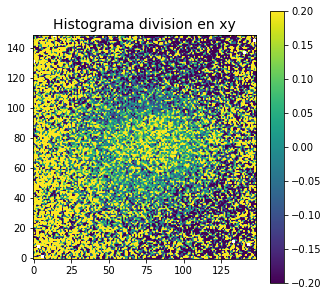

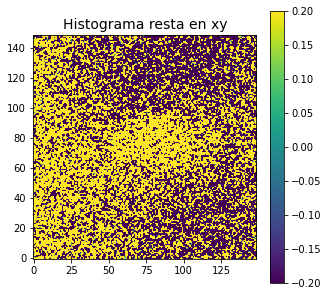

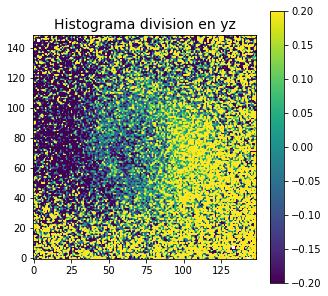

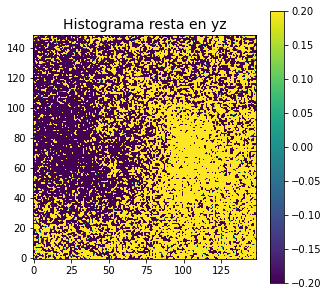

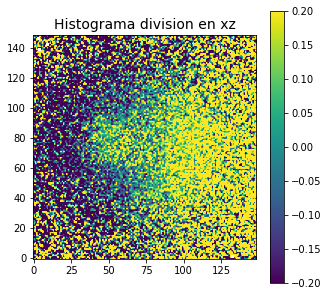

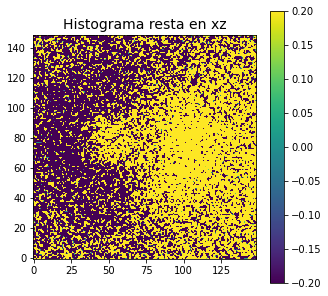

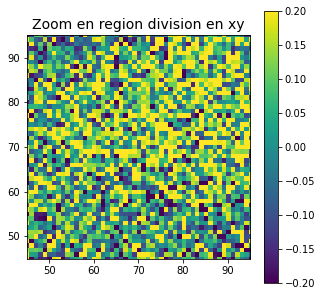

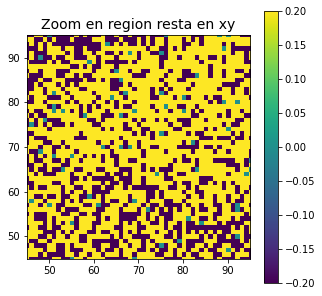

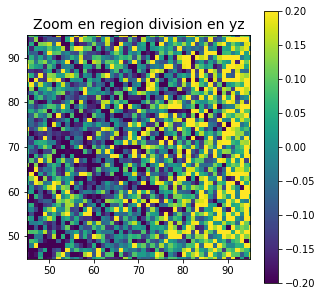

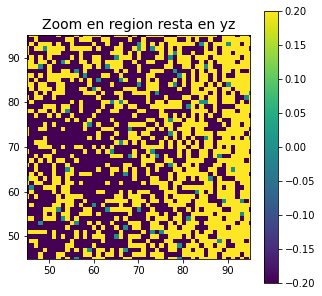

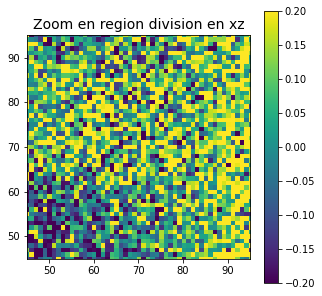

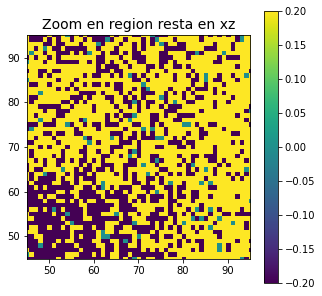

0

In [44]:
nparticles_xy_1 = density_xy_1[0]
nparticles_xy_2 = density_xy_2[0]
nparticles_yz_1 = density_yz_1[0]
nparticles_yz_2 = density_yz_2[0]
nparticles_xz_1 = density_xz_1[0]
nparticles_xz_2 = density_xz_2[0]


def histogram_comparison (density, figname ):
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    im = ax.imshow(density, vmin = -0.2, vmax=0.2)
    plt.colorbar(im) 
    plt.title("Histograma "+figname, fontsize=14)
    plt.gca().invert_yaxis()
    plt.savefig('./../media/imgs/histogram_comparison/'+figname +'.jpg', bbox_inches='tight')
    plt.show()
    plt.close()
    return 0


def histogram_comparison_zoom (density, figname ):
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    im = ax.imshow(density, vmin = -0.2, vmax=0.2)
    plt.colorbar(im)
    plt.title("Zoom en region "+figname, fontsize=14)
    plt.xlim(45,95)
    plt.ylim(45,95)
    plt.savefig('./../media/imgs/histogram_comparison_zoom/'+figname +'.jpg')
    plt.show()
    plt.close()
    return 0
    

# Comparacion de densidad de particulas
# Componenentes xy
division_xy = (nparticles_xy_2/nparticles_xy_1)-1
resta_xy = nparticles_xy_2-nparticles_xy_1

# Componentes yz
division_yz = (nparticles_yz_2/nparticles_yz_1)-1
resta_yz = nparticles_yz_2-nparticles_yz_1

# Componentes xz
division_xz = (nparticles_xz_2/nparticles_xz_1)-1
resta_xz = nparticles_xz_2-nparticles_xz_1

#Grafic de comparacion y zoom entre la densidad de particulas en el halo perturbado y el halo no perturbado

histogram_comparison(division_xy, "division en xy")
histogram_comparison(resta_xy, "resta en xy")
histogram_comparison(division_yz, "division en yz")
histogram_comparison(resta_yz, "resta en yz")
histogram_comparison(division_xz, "division en xz")
histogram_comparison(resta_xz, "resta en xz")

histogram_comparison_zoom(division_xy, "division en xy")
histogram_comparison_zoom(resta_xy, "resta en xy")
histogram_comparison_zoom(division_yz, "division en yz")
histogram_comparison_zoom(resta_yz, "resta en yz")
histogram_comparison_zoom(division_xz, "division en xz")
histogram_comparison_zoom(resta_xz, "resta en xz")



## Calculo componentes momento angular $$\vec{L}= \vec{r} \times \vec{v}$$


Importar data de las columnas de velocidad en un ndarray


In [30]:


#Position and velocity of halo particles in cartesian coordinates
#Import dataframe into numpy array

pos_mw = np.array([df_mw['x[kpc]'], df_mw['y[kpc]'], df_mw['z[kpc]']])
vel_mw = np.array([df_mw['vx[km/s]'], df_mw['vy[km/s]'], df_mw['vz[km/s]']])
pos_mw_lmc = np.array([df_mw_lmc['x[kpc]'], df_mw_lmc['y[kpc]'], df_mw_lmc['z[kpc]']])
vel_mw_lmc = np.array([df_mw_lmc['vx[km/s]'], df_mw_lmc['vy[km/s]'], df_mw_lmc['vz[km/s]']])


#Traspone los ndarrays
pos_mw.shape = (len(pos_mw[0]),3)
vel_mw.shape = (len(vel_mw[0]),3)
pos_mw_lmc.shape = (len(pos_mw_lmc[0]),3)
vel_mw_lmc.shape = (len(vel_mw_lmc[0]),3)

print("Dimensiones de mw arrays",pos_mw.ndim, vel_mw.ndim, pos_mw_lmc.ndim, vel_mw_lmc.ndim)
#Calculate angular momentum components

def angular_momentum(pos, vel):
    L = np.cross(pos, vel)
    mag = np.linalg.norm(L, axis=1)
    print("Magnitud de L:", mag)
    return L[:,0], L[:,1], L[:,2], mag

Lx1, Ly1, Lz1, mag_mw = angular_momentum(pos_mw, vel_mw)
Lx2, Ly2, Lz2, mag_mw_lmc = angular_momentum(pos_mw_lmc, vel_mw_lmc)
# print("Lx1", Lx1.shape, Lx1)
print("Tipo de Lx1", type(Lx1))
def total_angular_momentum(Lx, Ly, Lz):
    """_Funcion para calcular el momentum angular total_

    Args:
        Lx (_ndarray_): _Componente x del momento angular_
        Ly (_ndarray_): _Componente y del momento angular_
        Lz (_ndarray_): _Componente z del momento angular_

    Returns:
        _type_: _description_
    """
    L_tot = np.array([Lx, Ly, Lz])
    L_len = len(L_tot[0])    
    return np.sum(Lx)/L_len, np.sum(Ly)/L_len, np.sum(Lz)/L_len

L_tot_mw = total_angular_momentum(Lx1, Ly1, Lz1)
L_tot_mw_lmc = total_angular_momentum(Lx2, Ly2, Lz2)
print("L_tot_mw", L_tot_mw)
print("L_tot_mw_lmc", L_tot_mw_lmc)



Dimensiones de mw arrays 2 2 2 2
Magnitud de L: [18658.75680747 10121.89021513 12963.84264045 ... 35717.58563031
 81469.90181728 16635.03887103]
Magnitud de L: [ 4604.77067541 11607.61166702 22433.81039435 ... 46254.01491267
 10260.53404488 16430.21387385]
Tipo de Lx1 <class 'numpy.ndarray'>
L_tot_mw (28.311826879693268, 1.4809688712940245, -8.289737371916612)
L_tot_mw_lmc (-4.7305090090071165, -8.982781596672435, 12.153107742572441)


<p> Histograma yz con valores de x < 10 kpc<p>

In [49]:
#data processing for the MW non perturbed halo


pos_xy_mw = np.array([df_mw['x[kpc]'], df_mw['y[kpc]']])
pos_xy_mw_lmc = np.array([df_mw_lmc['x[kpc]'], df_mw_lmc['y[kpc]']])

pos_x_mw = np.array([df_mw['x[kpc]']])
pos_y_mw = np.array([df_mw['y[kpc]']])
pos_z_mw = np.array([df_mw['z[kpc]']])



within_10_kpc_mw = np.where((pos_x_mw > -10) & (pos_x_mw < 10))
# print(pos_x_mw[within_10_kpc_mw]) 
# print(within_10_kpc_mw)


#y and z position values for  non perturbed halo in x range -10 to 10 kpc
pos_y_in_x_range_mw = pos_y_mw[within_10_kpc_mw]
pos_z_in_x_range_mw = pos_z_mw[within_10_kpc_mw]

#data processing for the MW+LMC perturbed halo
pos_x_mw_lmc = np.array([df_mw_lmc['x[kpc]']])
pos_y_mw_lmc = np.array([df_mw_lmc['y[kpc]']])
pos_z_mw_lmc = np.array([df_mw_lmc['z[kpc]']])


within_10_kpc_mw_lmc = np.where((pos_x_mw_lmc > -10) & (pos_x_mw_lmc < 10))
pos_y_in_x_range_mw_lmc = pos_y_mw_lmc[within_10_kpc_mw_lmc]
pos_z_in_x_range_mw_lmc = pos_z_mw_lmc[within_10_kpc_mw_lmc]
print("pos_y_in_x_range_mw_lmc", pos_y_in_x_range_mw_lmc)
print("pos_z_in_x_range_mw_lmc", pos_z_in_x_range_mw_lmc)

pos_y_in_x_range_mw_lmc [134.52944946 -50.85941696  50.12338638 ... -18.70370293  35.91239548
  68.82998657]
pos_z_in_x_range_mw_lmc [ 52.58372879 -20.00106812 -51.37547302 ... -70.09864044 -35.20845413
   6.90480614]


<p> Histogram plot of yz plane with data indexes of given range <p>

C:\Users\Stephanie Cely\AppData\Local\Temp\ipykernel_9384\2187761567.py:9: RuntimeWarning: invalid value encountered in true_divide
  division_yz_in_x = (nparticles_yz_mw/nparticles_yz_mw)-1


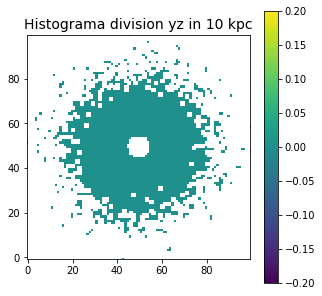

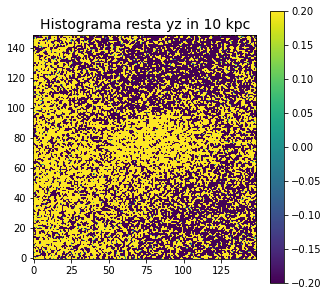

0

In [54]:
density_yz_mw = np.histogram2d(pos_y_in_x_range_mw, pos_z_in_x_range_mw, bins=100, )
density_yz_mw_lmc = np.histogram2d(pos_y_in_x_range_mw_lmc, pos_z_in_x_range_mw_lmc, bins=100,)


nparticles_yz_mw = density_yz_mw[0]
nparticles_yz_mw_lmc = density_yz_mw_lmc[0]

# Comparacion de densidad de particulas
division_yz_in_x = (nparticles_yz_mw/nparticles_yz_mw)-1
resta_yz_in_x = nparticles_xy_2-nparticles_xy_1
histogram_comparison(division_yz_in_x, "division yz in 10 kpc")
histogram_comparison(resta_yz_in_x, "resta yz in 10 kpc")

